In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


![](https://static1.therichestimages.com/wordpress/wp-content/uploads/feature95.jpg?q=50&fit=crop&w=960&h=500&dpr=1.5)(https://static1.therichestimages.com/wordpress/wp-content/uploads/feature95.jpg?q=50&fit=crop&w=960&h=500&dpr=1.5)

### Welcome to the world of video game sales data! In this project, we're embarking on a journey to uncover fascinating insights hidden within a treasure trove of gaming information. Our dataset comprises over 16,000 records, each representing a unique video game. Together, we'll explore trends, discover the most popular platforms, genres, etc. So, buckle up as we embark on this exciting adventure into the gaming industry since 1980!

# DATA PREPARATION AND CLEANING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr, f_oneway, chi2_contingency

In [3]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')

In [4]:
print(df)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


[INSERT COMMENT HERE]

In [6]:
# Check for missing values
missing_values = df.isnull()  # or df.isna()

# Count the number of missing values per column
missing_counts = missing_values.sum()

# Calculate the percentage of missing values per column
missing_percentages = (missing_counts / len(df)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

# Sort the DataFrame by the missing count in descending order
missing_data = missing_data.sort_values(by='Missing Count', ascending=False)

# Display the missing values information
print(missing_data)

              Missing Count  Missing Percentage
Year                    271            1.632727
Publisher                58            0.349440
Rank                      0            0.000000
Name                      0            0.000000
Platform                  0            0.000000
Genre                     0            0.000000
NA_Sales                  0            0.000000
EU_Sales                  0            0.000000
JP_Sales                  0            0.000000
Other_Sales               0            0.000000
Global_Sales              0            0.000000


[INSERT COMMENT HERE]

In [7]:
# Fill missing publisher values with "Unknown Publisher"
df_cleaned = df.fillna({'Publisher': 'Unknown Publisher'})

In [8]:
# Drop rows with null entries in 'Year' column
df_cleaned = df.dropna(subset=['Year'])

In [9]:
# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

In [10]:
# Convert the "Year" column to integers
df_cleaned['Year'] = df_cleaned['Year'].astype(int)

# Display the summary of the modified DataFrame
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [11]:
# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_vgsales.csv', index=False)

# EXPLORATORY ANALYSIS AND VISUALIZATION

In [12]:
# Load the cleaned dataset into a DataFrame
df_cleaned = pd.read_csv('cleaned_vgsales.csv')

print(df_cleaned)

        Rank                                              Name Platform  Year  \
0          1                                        Wii Sports      Wii  2006   
1          2                                 Super Mario Bros.      NES  1985   
2          3                                    Mario Kart Wii      Wii  2008   
3          4                                 Wii Sports Resort      Wii  2009   
4          5                          Pokemon Red/Pokemon Blue       GB  1996   
...      ...                                               ...      ...   ...   
16322  16596                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16323  16597                     Men in Black II: Alien Escape       GC  2003   
16324  16598  SCORE International Baja 1000: The Official Game      PS2  2008   
16325  16599                                        Know How 2       DS  2010   
16326  16600                                  Spirits & Spells      GBA  2003   

              Genre   Publi

## Platform

In [13]:
# Get value counts of 'Platform' column
platform_counts = df_cleaned['Platform'].value_counts()
platform_counts

Platform
DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      412
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

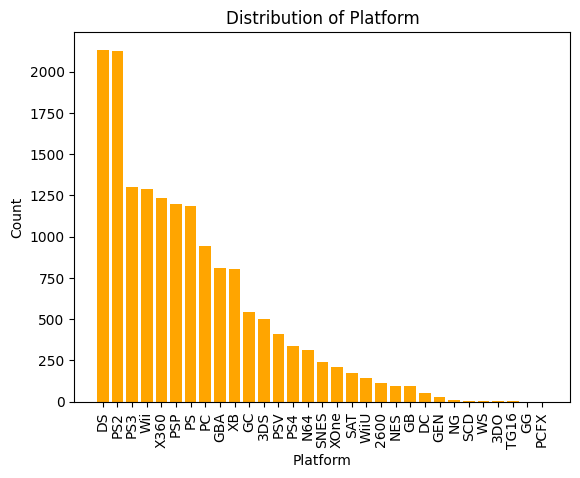

In [14]:
# Set the x and y values for the bar plot
x = platform_counts.index
y = platform_counts.values

# Create a bar plot
plt.bar(x, y, color='orange')

# Add labels and title
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Distribution of Platform')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Genre

In [15]:
# Get value counts of 'Genre' column
genre_counts = df_cleaned['Genre'].value_counts()
genre_counts

Genre
Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: count, dtype: int64

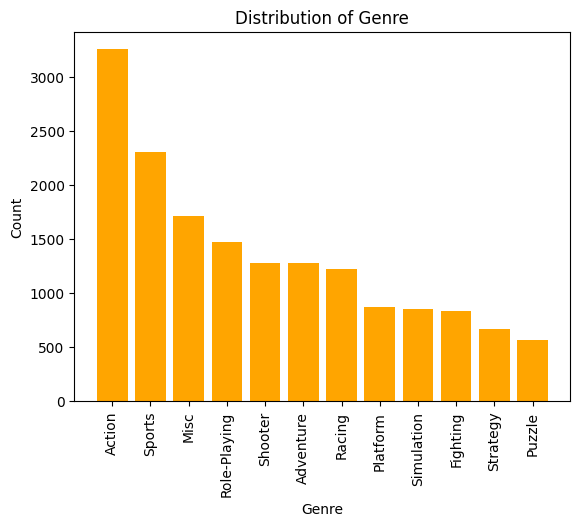

In [16]:
# Set the x and y values for the bar plot
x = genre_counts.index
y = genre_counts.values

# Create a bar plot
plt.bar(x, y, color='orange')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genre')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Publisher

In [17]:
# Get value counts of 'Publisher' column
publisher_counts = df_cleaned['Publisher'].value_counts()
publisher_counts

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

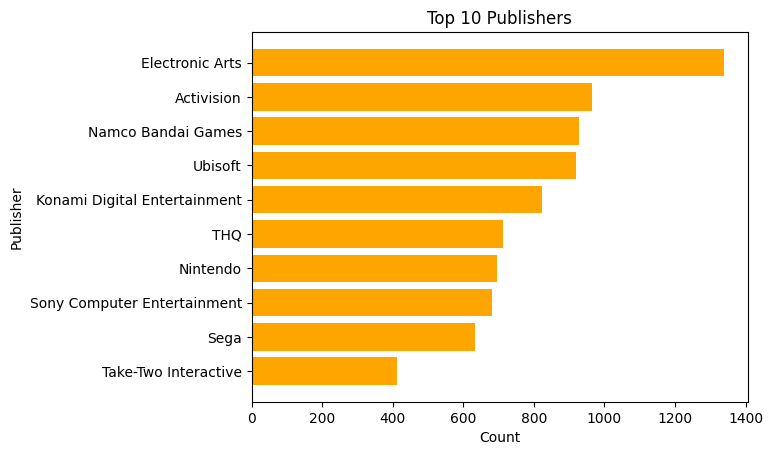

In [18]:
# Sort the data in descending order and select the top ten
top_10_publishers = publisher_counts.sort_values(ascending=False).head(10)

# Invert the order to display the highest count at the top
top_10_publishers = top_10_publishers[::-1]

# Set the x and y values for the horizontal bar plot
x = top_10_publishers.values
y = top_10_publishers.index

# Create a horizontal bar plot
plt.barh(y, x, color='orange')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.title('Top 10 Publishers')

# Display the plot
plt.show()

## Sales ( North America Sales, Europe Sales, Japan Sales, Other Sales, Global Sales)

In [19]:
# List of column names
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Compute and display summary statistics for selected sales columns
selected_columns_stats = df_cleaned[sales_columns].describe()

# Display the statistics for the selected sales columns
print(f'Summary statistics for selected sales columns:')
print(selected_columns_stats)

Summary statistics for selected sales columns:
           NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales
count  16327.000000  16327.000000  16327.000000  16327.000000  16327.000000
mean       0.265415      0.147554      0.078661      0.048325      0.540232
std        0.821591      0.508766      0.311557      0.189885      1.565732
min        0.000000      0.000000      0.000000      0.000000      0.010000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.040000      0.480000
max       41.490000     29.020000     10.220000     10.570000     82.740000


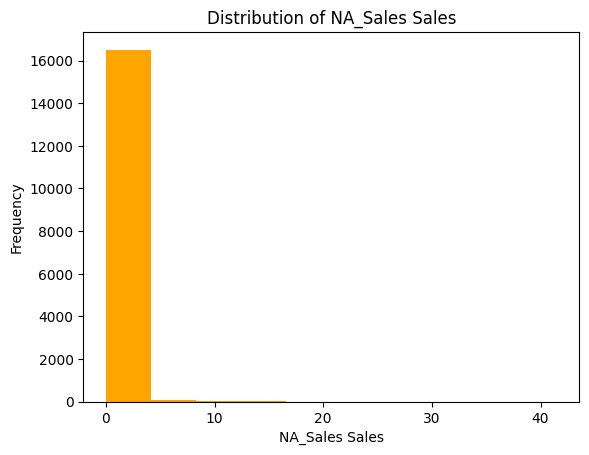

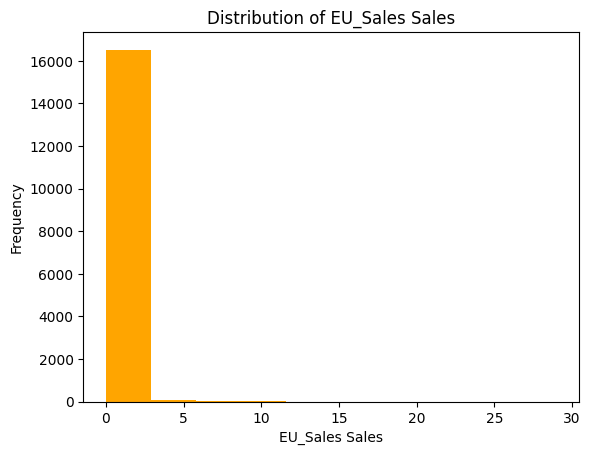

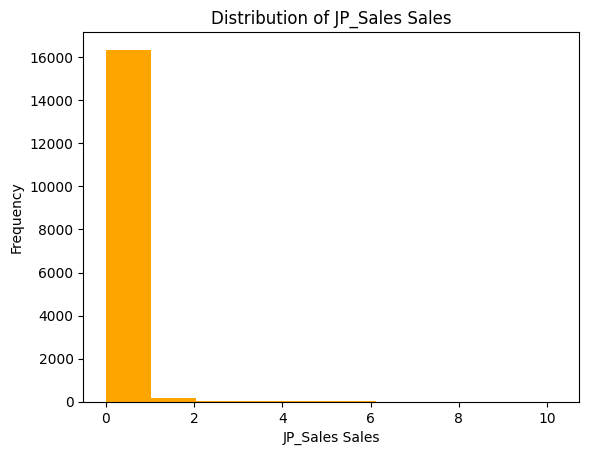

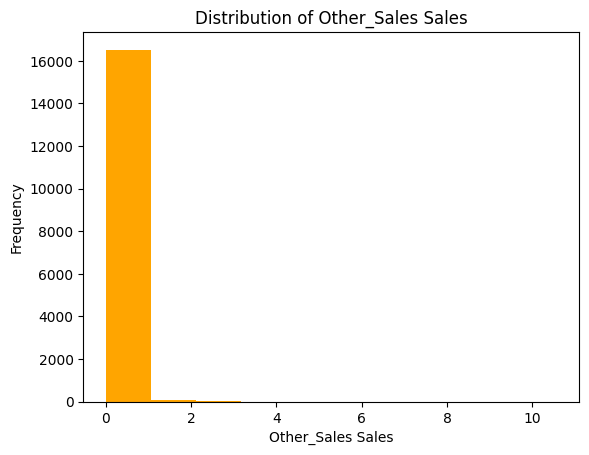

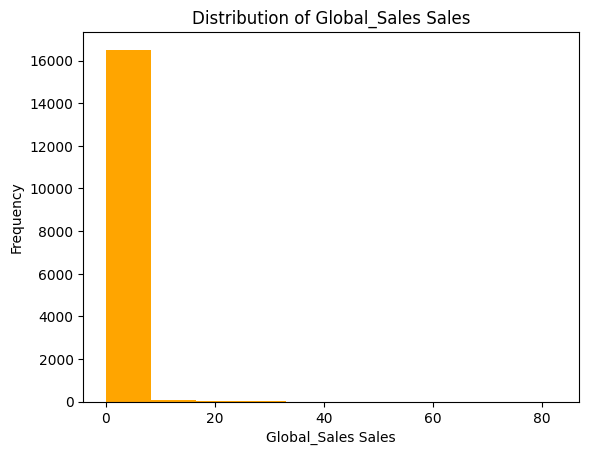

In [20]:
# List of column names
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Iterate through each sales column and create histograms
for column in sales_columns:
    # Create the histogram
    plt.hist(df[column], bins=10, color='orange')
    
    # Set labels and title
    plt.xlabel(f'{column} Sales')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column} Sales')
    
    # Show the plot for the current sales column
    plt.show()

# ASKING AND ANSWERING QUESTIONS

## 1. Does the popularity of gaming platforms vary over time? Are there trends in platform preference?

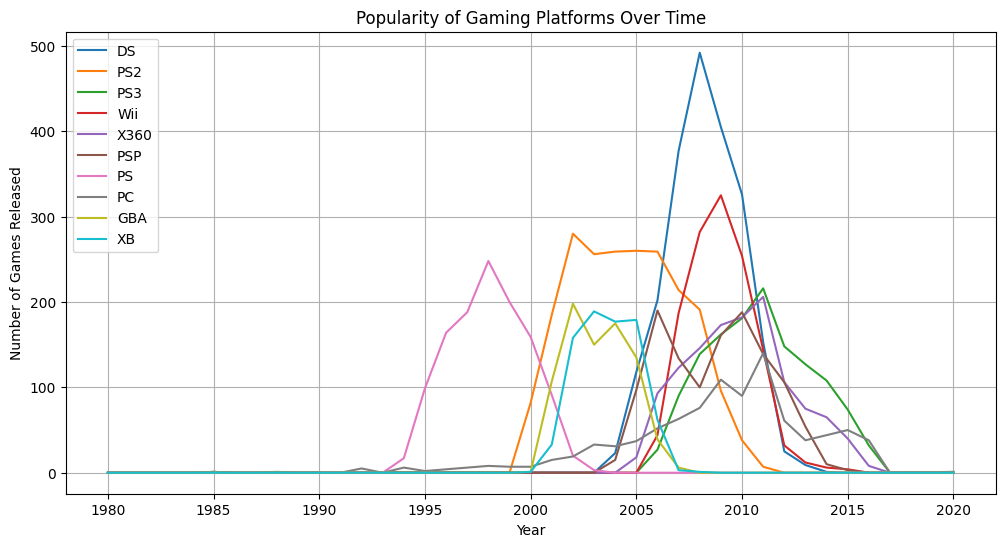

The most popular platform over the years is DS.


In [21]:
# Group the data by 'Year' and 'Platform' and count the number of games released each year for each platform
platform_year_counts = df_cleaned.groupby(['Year', 'Platform']).size().unstack(fill_value=0)

# Create a time series line plot showing the number of games released per year for each platform
plt.figure(figsize=(12, 6))
platforms_to_plot = ['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB']  # Replace with the platforms you want to analyze
for platform in platforms_to_plot:
    plt.plot(platform_year_counts.index, platform_year_counts[platform], label=platform)

plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Popularity of Gaming Platforms Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Calculate the average number of games released per platform per year
average_platform_year_counts = platform_year_counts.mean(axis=0)

# Analyze trends in platform preference
most_popular_platform = average_platform_year_counts.idxmax()

print(f"The most popular platform over the years is {most_popular_platform}.")

## 2. Are certain genres more profitable than others? Which genres generate the highest global sales?

<Figure size 1200x600 with 0 Axes>

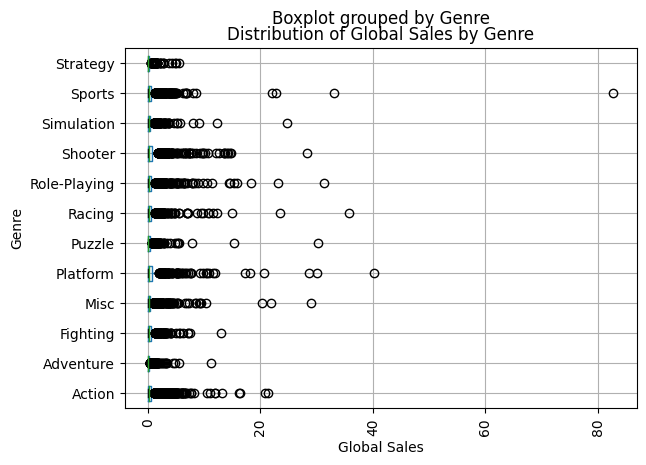

One-way ANOVA F-statistic: 18.24
p-value: 0.0000
There are significant differences in global sales among genres.


In [22]:
# Create a bar chart or box plot showing the distribution of global sales for different genres
plt.figure(figsize=(12, 6))
df_cleaned.boxplot(column='Global_Sales', by='Genre', vert=False)
plt.xlabel('Global Sales')
plt.ylabel('Genre')
plt.title('Distribution of Global Sales by Genre')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

# Perform a one-way ANOVA test to determine if there are significant differences in global sales among genres
genres = df_cleaned['Genre'].unique()
genre_groups = [df_cleaned[df_cleaned['Genre'] == genre]['Global_Sales'] for genre in genres]

# Perform the one-way ANOVA test
f_statistic, p_value = f_oneway(*genre_groups)

print(f'One-way ANOVA F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("There are significant differences in global sales among genres.")
else:
    print("There are no significant differences in global sales among genres.")

## 3. Has the video game industry seen growth in global sales over the years?

In [23]:
# Create a time series line plot displaying the total global sales per year
plt.figure(figsize=(12, 6))
plt.plot(yearly_global_sales.index, yearly_global_sales.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Global Sales')
plt.title('Growth of Video Game Industry Global Sales Over the Years')
plt.grid(True)

# Calculate the mean of global sales
mean_sales = yearly_global_sales.mean()

# Add a horizontal line indicating the mean
plt.axhline(y=mean_sales, color='red', linestyle='--', label=f'Mean Sales ({mean_sales:.2f})')

# Show legend with the mean sales line
plt.legend()

plt.show()

# Calculate the compound annual growth rate (CAGR) of global sales
first_year_sales = yearly_global_sales.iloc[0]
final_year_sales = yearly_global_sales.iloc[-1]
num_years = len(yearly_global_sales)
cagr = ((final_year_sales / first_year_sales) ** (1 / num_years)) - 1

print(f"Compound Annual Growth Rate (CAGR) of Global Sales: {cagr:.2%}")

NameError: name 'yearly_global_sales' is not defined

<Figure size 1200x600 with 0 Axes>

## 4. Is there a correlation between sales in North America and sales in Europe? Do games that perform well in one region tend to do well in another?

In [ ]:
# Create a scatter plot with NA_Sales on the x-axis and EU_Sales on the y-axis, with a regression line
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['NA_Sales'], df_cleaned['EU_Sales'], alpha=0.5)
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.title('Correlation Between NA Sales and EU Sales')
plt.grid(True)

# Calculate the Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(df_cleaned['NA_Sales'], df_cleaned['EU_Sales'])
print(f"Pearson Correlation Coefficient (r): {corr_coefficient:.2f}")
print(f"P-Value: {p_value:.4f}")

# Add a regression line
plt.plot(df_cleaned['NA_Sales'], corr_coefficient * df_cleaned['NA_Sales'], color='red', label=f'Correlation (r) = {corr_coefficient:.2f}')

# Interpret the correlation based on significance
if p_value < 0.05:
    if abs(corr_coefficient) >= 0.7:
        interpretation = "Strong positive correlation"
    elif 0.5 <= abs(corr_coefficient) < 0.7:
        interpretation = "Moderate positive correlation"
    elif 0.3 <= abs(corr_coefficient) < 0.5:
        interpretation = "Weak positive correlation"
else:
    interpretation = "No significant correlation"
    
print(f"Interpretation: {interpretation}")

plt.legend()
plt.show()

## 5. Do games from certain publishers have a higher average global sales figure than others?

In [ ]:
# Define the number of top publishers to consider
top_publishers_count = 5  # You can adjust this number as needed

# Group the data by 'Publisher' and calculate the total global sales for each publisher
publisher_global_sales = df_cleaned.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Select the top publishers based on global sales
top_publishers = publisher_global_sales.head(top_publishers_count).index.tolist()

# Filter the data for the top publishers
data_top_publishers = df_cleaned[df_cleaned['Publisher'].isin(top_publishers)]

# Create a box plot or violin plot showing the distribution of global sales for the top publishers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Publisher', y='Global_Sales', data=data_top_publishers)
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.title(f'Distribution of Global Sales for Top {top_publishers_count} Publishers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Perform a one-way ANOVA test to determine if there are significant differences in global sales among publishers
publisher_groups = [data_top_publishers[data_top_publishers['Publisher'] == publisher]['Global_Sales'] for publisher in top_publishers]
f_statistic, p_value = f_oneway(*publisher_groups)

print(f'One-way ANOVA F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("There are significant differences in global sales among the top publishers.")
else:
    print("There are no significant differences in global sales among the top publishers.")

## 6. Does the choice of genre affect a game's sales in specific regions, such as North America, Europe, or Japan?

In [ ]:
# Define the regions you want to analyze
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales']  # Add more regions if needed

# Create a stacked bar chart or grouped bar chart showing sales by genre in each region
plt.figure(figsize=(12, 6))

for region in regions:
    # Group the data by 'Genre' and calculate the total sales for each genre in the region
    genre_sales = df_cleaned.groupby('Genre')[region].sum().sort_values(ascending=False)
    
    # Create a bar chart for the current region
    sns.barplot(x=genre_sales.index, y=genre_sales.values, label=region)

plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Sales by Genre in Different Regions')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.show()

# Prepare data for the chi-squared test of independence
genre_region_table = pd.pivot_table(df_cleaned, values=regions, index='Genre', aggfunc='sum')

# Perform a chi-squared test of independence to assess if there is a significant association between genre and region for sales
chi2, p, _, _ = chi2_contingency(genre_region_table)
print(f'Chi-squared statistic: {chi2:.2f}')
print(f'p-value: {p:.4f}')

# Interpret the results
alpha = 0.05  # Set your significance level
if p < alpha:
    print("There is a significant association between genre and region for sales.")
else:
    print("There is no significant association between genre and region for sales.")

# CONCLUSIONS

### 1. The most popular platform over the years is DS (Nintendo "Developer's System" or "Dual Screen").
### 2. There are significant differences in global sales among genres.
### 3. On average, global sales have been declining at an annual rate of 8.98% from 1980 to 2020.
### 4. There is a significant Strong positive correlation between NA sales and EU sales.
### 5. There are significant differences in global sales among the top publishers.
### 6. There is a significant association between genre and region for sales.

# FUTURE WORK

* ### Platform Popularity Trends. Investigate the reasons behind the popularity of specific platforms and explore emerging platforms.

* ### Genre-Based Sales Analysis. Conduct deeper analyses within genres to understand what factors contribute to significant differences in global sales.

* ### Global Sales Decline. Further investigate the factors contributing to the annual decline in global sales and explore potential strategies for reversing this trend.

* ### Regional Correlations. Further investigate if specific game characteristics or marketing strategies that influence the correlations.

* ### Publisher Impact. Identify specific publisher strategies or game attributes that contribute to these differences. 

* ### Genre and Region Association. Explore the association between genre and region for sales in more detail.

* ### Predictive Modeling. Consider building predictive models to forecast future trends in the gaming industry, such as platform popularity, genre preferences, or global sales.

# REFERENCES

* ### Video Game Sales dataset. https://www.kaggle.com/datasets/gregorut/videogamesales
* ### Matplotlib User Guide. https://matplotlib.org/stable/users/index.html
* ### Pandas User Guide. https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html
* ### Seaborn User Guide. https://seaborn.pydata.org/tutorial.html
* ### SciPy User Guide. https://docs.scipy.org/doc/scipy/tutorial/index.html